# IT17250498 - DL Assignment 2 - SLIIT

## Importing required libraries

In [82]:
# Importing required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## Verifying GPU setup

In [83]:
# Printing number of accesible GPUs.
available_physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of Available GPUs: ", len(available_physical_devices))
tf.config.experimental.set_memory_growth(available_physical_devices[0], True)

Number of Available GPUs:  1


## Organizing the data

In [84]:
# Organizing the data into test, valid, and, train directories.
os.chdir('chest_xray')
if os.path.isdir('train2/NORMAL') is False:
    os.makedirs('train2/NORMAL')
    os.makedirs('train2/PNEUMONIA')
    os.makedirs('valid2/NORMAL')
    os.makedirs('valid2/PNEUMONIA')
    os.makedirs('test2/NORMAL')
    os.makedirs('test2/PNEUMONIA')
    
    for i in random.sample(glob.glob('train/NORMAL/NORMAL*'), 1000):
        shutil.move(i, 'train2/NORMAL')
    for i in random.sample(glob.glob('train/PNEUMONIA/BACTERIA*'), 1000):
        shutil.move(i, 'train2/PNEUMONIA')
    for i in random.sample(glob.glob('train/NORMAL/NORMAL*'), 300):
        shutil.move(i, 'valid2/NORMAL')
    for i in random.sample(glob.glob('train/PNEUMONIA/BACTERIA*'), 300):
        shutil.move(i, 'valid2/PNEUMONIA')
    for i in random.sample(glob.glob('test/NORMAL/NORMAL*'), 200):
        shutil.move(i, 'test2/NORMAL')
    for i in random.sample(glob.glob('test/PNEUMONIA/BACTERIA*'), 200):
        shutil.move(i, 'test2/PNEUMONIA')
        
os.chdir('../')
os.getcwd()

'C:\\Users\\Lakshan Bandara'

## Setting the Directory Paths

In [85]:
# set the path to the train, valid, and test directories
train_path2 = 'chest_xray/train2'
valid_path2 = 'chest_xray/valid2'
test_path2 = 'chest_xray/test2'

## Preparing Images for Convolutional Neural Network

In [86]:
# set dimensions of images.
image_width, image_height = 224, 224

In [87]:
# Preparing Images for Convolutional Neural Network
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path2, target_size=(image_width, image_height), classes=['NORMAL', 'PNEUMONIA'], batch_size=20)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path2, target_size=(image_width, image_height), classes=['NORMAL', 'PNEUMONIA'], batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path2, target_size=(image_width, image_height), classes=['NORMAL', 'PNEUMONIA'], batch_size=20, shuffle=False)

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [88]:
# validating whether the program has access to all the images.
assert train_batches.n == 2000
assert valid_batches.n == 600
assert test_batches.n == 400
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

## Plotting a few Sample Images and Their Labels

In [89]:
# selecting single batch from tranining batches
images, labels = next(train_batches)

In [90]:
# this fucntion is used to plot images.
# Here, seven images from a single batch is plotted.
def plotImages(images_arr):
    fig, axed = plt.subplots(1, 7, figsize=(20,40))
    axes = axed.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


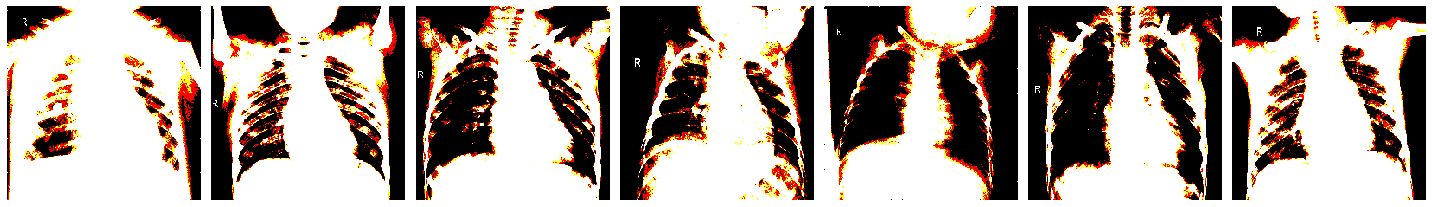

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [91]:
# plotting the images and printing the labales.
plotImages(images)
print(labels)

## Building the Convolutional Neural Network

In [92]:
# Architecture 01
#input_shape = (image_width, image_height, 3)
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding = "same"))
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"))
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = "same"))
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128,activation='relu'))

#d2 = tf.keras.layers.Dense(64,activation='relu')
#model.add(d2)

#d3 = tf.keras.layers.Dense(32,activation='relu')
#model.add(d3)

#model.add(tf.keras.layers.Dropout(0.5))

#d4=  tf.keras.layers.Dense(units=2,activation='softmax')
#model.add(d4)

In [93]:
#Architecture 2
#input_shape = (image_width, image_height, 3)
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [94]:
#Architecture 3
input_shape = (image_width, image_height, 3)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [95]:
#Architecture 4
#input_shape = (image_width, image_height, 3)
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding = "same"))
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = "same"))
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"))
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(64,activation='relu'))

#d2 = tf.keras.layers.Dense(32,activation='relu')
#model.add(d2)

#model.add(tf.keras.layers.Dropout(0.5))

#d3 =  tf.keras.layers.Dense(units=2,activation='softmax')
#model.add(d3)

In [96]:
# Printing the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 43264)            

## Training the Model

In [97]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [98]:
# Training the model
model.fit(
    x=train_batches,
    steps_per_epoch=100,
    epochs=7,
    validation_data=valid_batches,
    validation_steps=30,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 30 steps
Epoch 1/7
100/100 [==============================] - 48s 483ms/step - loss: 5.7840 - accuracy: 0.7640 - val_loss: 0.2034 - val_accuracy: 0.9333
Epoch 2/7
100/100 [==============================] - 38s 379ms/step - loss: 0.5137 - accuracy: 0.8730 - val_loss: 0.1107 - val_accuracy: 0.9567
Epoch 3/7
100/100 [==============================] - 40s 398ms/step - loss: 0.2952 - accuracy: 0.9065 - val_loss: 0.1380 - val_accuracy: 0.9500
Epoch 4/7
100/100 [==============================] - 37s 371ms/step - loss: 0.2733 - accuracy: 0.9255 - val_loss: 0.1003 - val_accuracy: 0.9550
Epoch 5/7
100/100 [==============================] - 44s 438ms/step - loss: 0.2541 - accuracy: 0.9420 - val_loss: 0.1099 - val_accuracy: 0.9600
Epoch 6/7
100/100 [==============================] - 39s 389ms/step - loss: 0.2819 - accuracy: 0.9595 - val_loss: 0.1109 - val_accuracy: 0.9750
Epoch 7/7
100/100 [========================


## Predicting On Test Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


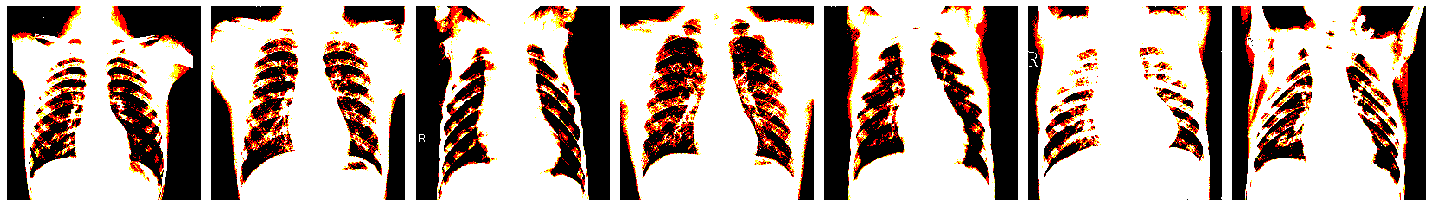

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [99]:
# Plotting images and printing labels of few test samples.
test_images, test_labels = next(test_batches)
plotImages(test_images)
print(test_labels)

In [100]:
#Printing the clasees fo test set samples.
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [101]:
# Making the prediction on test sest.
predictions = model.predict(x=test_batches, verbose=0)

In [102]:
# Printng the result of one round of predictions.
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [103]:
# generating a confusion matrix.
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [104]:
# This fucntion is taken form the scikit-learn website to plot the confusion matrix.
def plot_confusion_matrix(cm,
                          classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens,
                          fig_size=(50,50)
                         ):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print('Confusion matrix')
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            fontSize=12,
            horizontalalignment="center",
            color="grey" if cm[i, j] > thresh else "red")

    plt.ylim([1.5, -.5])
    plt.tight_layout()
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')

In [105]:
# Plotting the class indices.
test_batches.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Confusion matrix
[[154  46]
 [  3 197]]


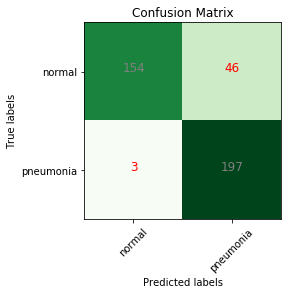

In [106]:
# Plotting the confusion matrix.
cm_plot_labels = ['normal','pneumonia']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')